#  Linear Regression with One Variable

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
The file ex1data1.txt (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

First, as with doing any machine learning task, we need to import certain libraries.

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'ex1data1.txt', 'ex1data2.txt']


In [15]:
data = pd.read_csv('data/ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data


,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


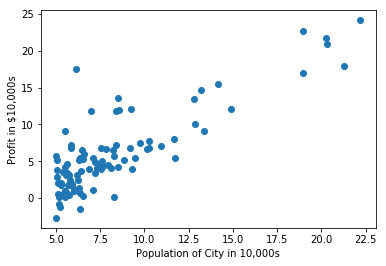

In [16]:
#Plot Data
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# Adding the intercept term

In the following lines, we add another dimension to our data to accommodate the intercept term (the reason for doing this is explained in the videos). We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01.

In [17]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

np.newaxis is used if you want to convert 1-D array (shape: N elements) into row vector (shape: N rows, 1 column) or column vector (shape: 1 row, N columns). Here we are rearranging X and y into column vectors.

Next we will be computing the cost and the gradient descent. The way to do this is very well explained by Andrew Ng in the video lectures. I am only providing the Python codes for the pseudo code which Andrew Ng uses in the lectures.

# Computing the cost

In [18]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

32.0727338775


You should expect to see a cost of 32.07.

# Finding the optimal parameters using Gradient Descent

In [19]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Expected theta values [-3.6303, 1.1664]


We now have the optimized value of theta . Use this value in the above cost function.

In [20]:
J = computeCost(X, y, theta)
print(J)

4.48338825659


It should give you a value of 4.483 which is much better than 32.07

# Plot showing the best fit line

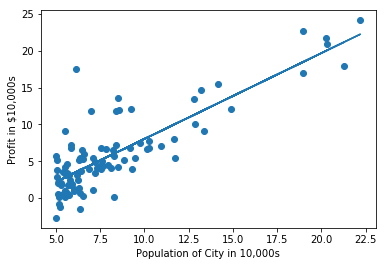

In [8]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.savefig('graph.png')
plt.show()

Lets extend the idea of linear regression to work with multiple independent variables.

# Linear Regression with multiple variables

In this section, we will implement linear regression with multiple variables (also called Multivariate Linear Regression).

*Problem context:
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.*

The file ex1data2.txt((available under week 2’s assignment material)) contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

You already have the necessary infrastructure which we built in our previous section that can be easily applied to this section as well. Here we will just use the equations which we made in the above section.

In [9]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/ex1data2.txt', sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


As can be seen above we are dealing with more than one independent variables here (but the concepts you have learnt in the previous section applies here as well).

# Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to:

* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [10]:
X = (X - np.mean(X))/np.std(X)

# Adding the intercept term and initializing parameters

(the below code is similar to what we did in the previous section)

In [11]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

# Computing the cost

In [36]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


You should expect to see a cost of 65591548106.45744.

# Finding the optimal parameters using Gradient Descent

In [37]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


your optimal parameters will be [[334302.06399328],[ 99411.44947359], [3267.01285407]]

We now have the optimized value of theta . Use this value in the above cost function.

In [38]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474


This should give you a value of 2105448288.6292474 which is much better than 65591548106.45744

You now have learnt how to perform Linear Regression with one or more independent variables. Well done!

